In [1]:
import pandas as pd

In [10]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate sensible data
rows = 100
iq = np.random.normal(100, 15, rows).round(2)
cgpa = np.random.uniform(2.0, 4.0, rows).round(2)
marks_12th = np.random.randint(60, 100, rows)

# Generate target based on IQ, CGPA, and 12th marks
placement = np.where((iq >= 90) & (cgpa >= 3.0) & (marks_12th >= 70), 1, 0)

# Generate gender (50% male, 50% female)
gender = np.random.choice(['Male', 'Female'], size=rows)

# Create a DataFrame
data = pd.DataFrame({
    'IQ': iq,
    'CGPA': cgpa,
    '12th Marks': marks_12th,
    'Gender': gender,
    'Placement': placement
})

# Display the DataFrame
print(data)

        IQ  CGPA  12th Marks  Gender  Placement
0   107.45  2.83          93  Female          0
1    97.93  2.44          80  Female          0
2   109.72  2.24          89  Female          0
3   122.85  2.68          92    Male          0
4    96.49  3.89          87  Female          1
..     ...   ...         ...     ...        ...
95   78.05  2.49          71    Male          0
96  104.44  3.95          60  Female          0
97  103.92  2.79          60    Male          0
98  100.08  3.78          93    Male          1
99   96.48  3.26          91  Female          1

[100 rows x 5 columns]


In [3]:
import seaborn as sns

<Axes: xlabel='IQ', ylabel='CGPA'>

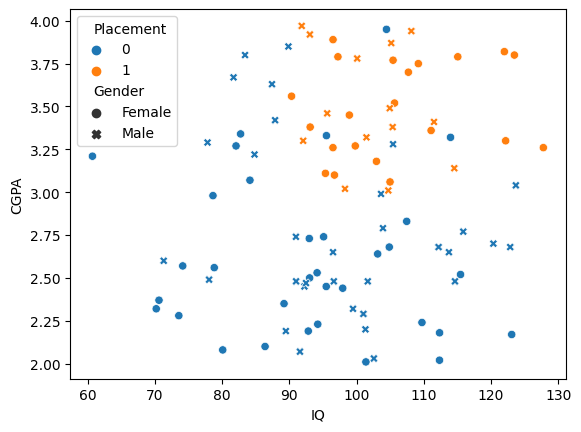

In [11]:
sns.scatterplot(data,x='IQ',y='CGPA',hue='Placement',style='Gender')

In [8]:
data.head()

,IQ,CGPA,12th Marks,Placement
0,107.45,2.83,93,0
1,97.93,2.44,80,0
2,109.72,2.24,89,0
3,122.85,2.68,92,0
4,96.49,3.89,87,1


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
numeric_col = ['IQ','CGPA','12th Marks']
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('Scaler',StandardScaler())])

categorical_col = ['Gender']
categorical_transformer = Pipeline(steps=[
    ('OneHotEncoding',OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_col),
        ('cat',categorical_transformer,categorical_col)
    ]
)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = Pipeline(
    steps=[
        ('preprocessing',preprocessor),('classifier',LogisticRegression())
    ]
)

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
x = data.drop(columns=['Placement'],axis=1)
y = data[['Placement']]

In [22]:
y

,Placement
0,0
1,0
2,0
3,0
4,1
...,...
95,0
96,0
97,0
98,1


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
clf.fit(x_train,y_train)

c:\Users\qaise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['IQ', 'CGPA', '12th Marks']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('classifier', LogisticRegression())])

In [25]:
predictions = clf.predict(x_test)

In [26]:
predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,predictions)

0.9